# Data Preprocessing of MURA

### Load Necessary functions

In [1]:
import sys
import os

#add root directory to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    
from utils.transforms import get_train_transforms, get_val_transforms
from utils.mura_dataset import MURADataset
from torch.utils.data import DataLoader

### For model training use this

In [2]:
transform = get_train_transforms()
train_dataset = MURADataset(
    csv_file="../data/splits/train_labeled_studies_split.csv", #ensure this is path to train split
    transform=transform,
    root_dir="../data/raw"
)

val_transform = get_val_transforms()
val_dataset = MURADataset(
    csv_file="../data/splits/val_labeled_studies_split.csv", #path to 20% model val set *not the "test" validation set
    transform=val_transform,
    root_dir="../data/raw"
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### This for eval

In [4]:
test_dataset = MURADataset(
    csv_file="../data/splits/valid_labeled_studies.csv",
    transform=val_transform,
    root_dir="../data/raw"
)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


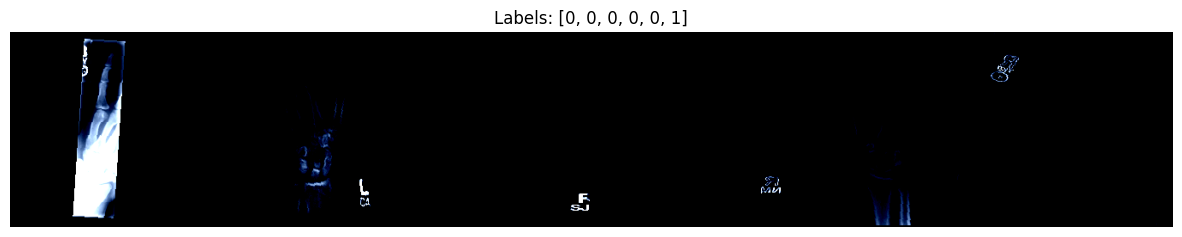

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.64].


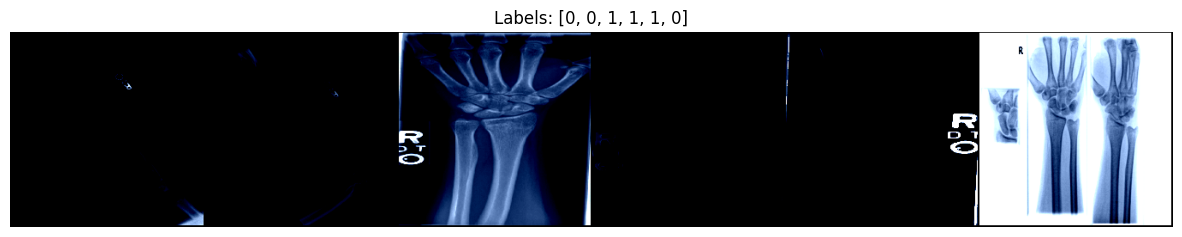

In [6]:
import matplotlib.pyplot as plt
import torchvision

def show_batch(loader, n=6):
    for images, labels in loader:
        grid = torchvision.utils.make_grid(images[:n], nrow=n)
        plt.figure(figsize=(15, 5))
        plt.imshow(grid.permute(1, 2, 0).numpy(), cmap="gray")
        plt.title(f"Labels: {labels[:n].tolist()}")
        plt.axis('off')
        plt.show()
        break

show_batch(train_loader)
show_batch(val_loader)


In [7]:
print(f"Train: {len(train_dataset)} samples")
print(f"Val:   {len(val_dataset)} samples")
print(f"Test:  {len(test_dataset)} samples")

Train: 29471 samples
Val:   7337 samples
Test:  3197 samples


In [8]:
from collections import Counter

def print_class_dist(dataset, name):
    labels = [label for _, label in dataset]
    counter = Counter(labels)
    total = sum(counter.values())
    print(f"\n{name} class distribution:")
    for k, v in counter.items():
        print(f"  Class {k}: {v} ({v/total:.2%})")

print_class_dist(train_dataset, "Train")
print_class_dist(val_dataset, "Val")
print_class_dist(test_dataset, "Test")


Train class distribution:
  Class 0: 17589 (59.68%)
  Class 1: 11882 (40.32%)

Val class distribution:
  Class 0: 4346 (59.23%)
  Class 1: 2991 (40.77%)

Test class distribution:
  Class 1: 1530 (47.86%)
  Class 0: 1667 (52.14%)
